In [118]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [149]:
# read labels
csv = pd.read_csv('hospital_ready.csv')
labels = csv.columns[:-1]

In [68]:
my_data = genfromtxt('hospital_ready.csv', delimiter=',')[1:]
X = my_data[:,:-1]
Y = my_data[:, -1]

In [70]:
# scaling
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train = X[:60000,:]
X_test = X[60000:,:]
Y_train = Y[:60000]
Y_test = Y[60000:]

In [84]:
# functions
def get_error(y1, y2):
    return np.mean(abs(y1-y2))

def get_acc_lr(y1, y2, labels):
    right = 0
    for i in range(len(y1)):
        diff = [abs(y1[i] - label) for label in labels]
        idx = np.argmin(diff)
        y1[i] = labels[idx]
    
    return sum(y1==y2)/len(y1)
    

In [99]:
# fit model
reg = LogisticRegression().fit(X_train, Y_train)
Y_head = reg.predict(X_train)

/home/jinwei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jinwei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [100]:
Y_testh= reg.predict(X_test)
Y_trainh = reg.predict(X_train)

In [105]:
print(get_error(Y_testh, Y_test))
print(get_acc(Y_testh, Y_test, [1,2,3]))

0.5270880361173815
0.7054176072234764


In [122]:
# visualize the coef
# class 0
coef0 = []
for i in range(len(reg.coef_[0])):
    coef0.append((abs(reg.coef_[0][i]), i, labels[i], reg.coef_[0][i]))
coef0 = list(reversed(sorted(coef0)))

In [123]:
coef0

[(6.17924362697192, 9, 'number_emergency', -6.17924362697192),
 (5.287297946139257, 10, 'number_inpatient', -5.287297946139257),
 (3.109589625795336, 8, 'number_outpatient', -3.109589625795336),
 (1.8200520816600017, 11, 'number_diagnoses', -1.8200520816600017),
 (0.7928093545529517, 26, 'miglitol', -0.7928093545529517),
 (0.5641648305540123, 44, 'diabetesMed_No', 0.5641648305540123),
 (0.5304043885084723, 41, 'gender_Unknown/Invalid', 0.5304043885084723),
 (0.49850712954037407, 22, 'tolbutamide', 0.49850712954037407),
 (0.4310254447387262, 43, 'change_No', 0.4310254447387262),
 (0.42433901737408436, 19, 'acetohexamide', -0.42433901737408436),
 (0.4111869178949286, 36, 'race_Caucasian', -0.4111869178949286),
 (0.4103472626421744, 25, 'acarbose', -0.4103472626421744),
 (0.4041002194562447, 0, 'age', -0.4041002194562447),
 (0.4002776364390523, 53, 'diagnose1_Other', 0.4002776364390523),
 (0.3848738274255069, 31, 'glipizide.metformin', -0.3848738274255069),
 (0.38032772838758233, 42, 'cha

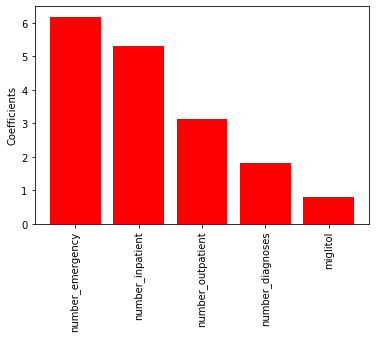

In [160]:
names = [e[2] for e in coef0[:5]]
heights= [e[0] for e in coef0[:5]]
vals = [e[3] for e in coef0[:5]]
colors = ['g' if e[3] > 0 else 'r' for e in coef0[:5]]
y_pos = np.arange(5)
plt.bar(y_pos, heights, color=colors)
plt.xticks(y_pos, names, rotation='vertical')
plt.ylabel('Coefficients')
plt.savefig('LR_class1.jpg',bbox_inches='tight')

In [161]:
for i in range(5):
    print(names[i], ": ", vals[i])

number_emergency :  -6.17924362697192
number_inpatient :  -5.287297946139257
number_outpatient :  -3.109589625795336
number_diagnoses :  -1.8200520816600017
miglitol :  -0.7928093545529517


In [124]:
# class1
coef1 = []
for i in range(len(reg.coef_[1])):
    coef1.append((abs(reg.coef_[1][i]), i, labels[i], reg.coef_[1][i]))
coef1 = list(reversed(sorted(coef1)))

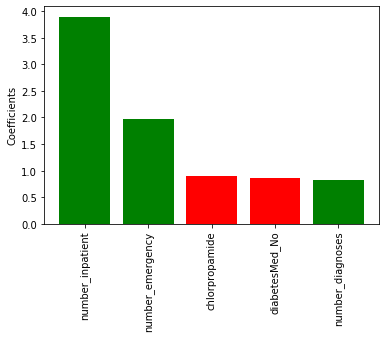

In [162]:
names = [e[2] for e in coef1[:5]]
heights= [e[0] for e in coef1[:5]]
colors = ['g' if e[3] > 0 else 'r' for e in coef1[:5]]
vals = [e[3] for e in coef1[:5]]
y_pos = np.arange(5)
plt.bar(y_pos, heights, color=colors)
plt.xticks(y_pos, names, rotation='vertical')
plt.ylabel('Coefficients')
plt.savefig('LR_class2.jpg', bbox_inches='tight')

In [163]:
for i in range(5):
    print(names[i], ": ", vals[i])

number_inpatient :  3.8989570904297075
number_emergency :  1.9616037290918948
chlorpropamide :  -0.896685456127739
diabetesMed_No :  -0.8648345034283673
number_diagnoses :  0.8238872938405993


In [128]:
# class2
coef2 = []
for i in range(len(reg.coef_[2])):
    coef2.append((abs(reg.coef_[2][i]), i, labels[i], reg.coef_[2][i]))
coef2 = list(reversed(sorted(coef2)))

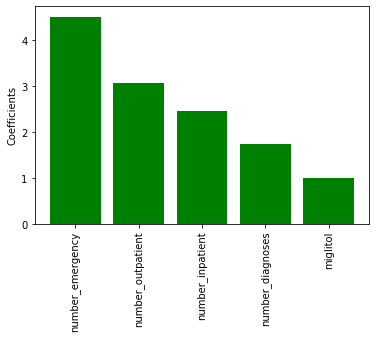

In [164]:
names = [e[2] for e in coef2[:5]]
heights= [e[0] for e in coef2[:5]]
colors = ['g' if e[3] > 0 else 'r' for e in coef2[:5]]
vals = [e[3] for e in coef2[:5]]
y_pos = np.arange(5)
plt.bar(y_pos, heights, color=colors)
plt.xticks(y_pos, names, rotation='vertical')
plt.ylabel('Coefficients')
plt.savefig('LR_class3.jpg', bbox_inches='tight')

In [165]:
for i in range(5):
    print(names[i], ": ", vals[i])

number_emergency :  4.504286731632664
number_outpatient :  3.0688749970826037
number_inpatient :  2.4413010917318103
number_diagnoses :  1.725580176284693
miglitol :  0.9852093550584486
